# Imports

In [10]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from scipy.stats import boxcox
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
import pickle

# Data Importing

In [2]:
# Load the datasets
data_2015 = pd.read_csv('data/2015.csv')
data_2016 = pd.read_csv('data/2016.csv')
data_2017 = pd.read_csv('data/2017.csv')
data_2018 = pd.read_csv('data/2018.csv')
data_2019 = pd.read_csv('data/2019.csv')

# Display the first few rows of each dataframe to understand their structure
print(data_2015.head())
print(data_2016.head())
print(data_2017.head())
print(data_2018.head())
print(data_2019.head())

       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938           

# Data Preprocessing

In [3]:
# Standardizing column names
columns_2015 = {
    'Country': 'Country',
    'Region': 'Region',
    'Happiness Rank': 'Happiness Rank',
    'Happiness Score': 'Happiness Score',
    'Standard Error': 'Standard Error',
    'Economy (GDP per Capita)': 'GDP per Capita',
    'Family': 'Social Support',
    'Health (Life Expectancy)': 'Healthy life expectancy',
    'Freedom': 'Freedom to make life choices',
    'Trust (Government Corruption)': 'Perceptions of corruption',
    'Generosity': 'Generosity',
    'Dystopia Residual': 'Dystopia Residual'
}

columns_2016 = {
    'Country': 'Country',
    'Region': 'Region',
    'Happiness Rank': 'Happiness Rank',
    'Happiness Score': 'Happiness Score',
    'Standard Error': 'Standard Error',
    'Economy (GDP per Capita)': 'GDP per Capita',
    'Family': 'Social Support',
    'Health (Life Expectancy)': 'Healthy life expectancy',
    'Freedom': 'Freedom to make life choices',
    'Trust (Government Corruption)': 'Perceptions of corruption',
    'Generosity': 'Generosity',
    'Dystopia Residual': 'Dystopia Residual'
}

columns_2017 = {
    'Country': 'Country',
    'Region': 'Region',
    'Happiness.Rank': 'Happiness Rank',
    'Happiness.Score': 'Happiness Score',
    'Standard Error': 'Standard Error',
    'Economy..GDP.per.Capita.': 'GDP per Capita',
    'Family': 'Social Support',
    'Health..Life.Expectancy.': 'Healthy life expectancy',
    'Freedom': 'Freedom to make life choices',
    'Trust..Government.Corruption.': 'Perceptions of corruption',
    'Generosity': 'Generosity',
    'Dystopia Residual': 'Dystopia Residual'
}

columns_2018 = {
    'Country or region': 'Country',
    'Region': 'Region',
    'Overall rank': 'Happiness Rank',
    'Score': 'Happiness Score',
    'Standard Error': 'Standard Error',
    'GDP per capita': 'GDP per Capita',
    'Social support': 'Social Support',
    'Health (Life Expectancy)': 'Healthy life expectancy',
    'Freedom': 'Freedom to make life choices',
    'Trust (Government Corruption)': 'Perceptions of corruption',
    'Generosity': 'Generosity',
    'Dystopia Residual': 'Dystopia Residual'
}

columns_2019 = {
    'Country or region': 'Country',
    'Region': 'Region',
    'Overall rank': 'Happiness Rank',
    'Score': 'Happiness Score',
    'Standard Error': 'Standard Error',
    'GDP per capita': 'GDP per Capita',
    'Social support': 'Social Support',
    'Health (Life Expectancy)': 'Healthy life expectancy',
    'Freedom': 'Freedom to make life choices',
    'Trust (Government Corruption)': 'Perceptions of corruption',
    'Generosity': 'Generosity',
    'Dystopia Residual': 'Dystopia Residual'
}

# Renaming columns in each dataset
data_2015.rename(columns=columns_2015, inplace=True)
data_2016.rename(columns=columns_2016, inplace=True)
data_2017.rename(columns=columns_2017, inplace=True)
data_2018.rename(columns=columns_2018, inplace=True)
data_2019.rename(columns=columns_2019, inplace=True)

# Adding Year column to each dataframe
data_2015['Year'] = 2015
data_2016['Year'] = 2016
data_2017['Year'] = 2017
data_2018['Year'] = 2018
data_2019['Year'] = 2019

# Selecting relevant columns
columns_to_keep = ['Country', 'Year', 'Happiness Score', 'GDP per Capita', 'Social Support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
data_2015 = data_2015[columns_to_keep]
data_2016 = data_2016[columns_to_keep]
data_2017 = data_2017[columns_to_keep]
data_2018 = data_2018[columns_to_keep]
data_2019 = data_2019[columns_to_keep]

# Combining all dataframes
combined_data = pd.concat([data_2015, data_2016, data_2017, data_2018, data_2019], ignore_index=True)
combined_data.head()

#save the dataframe
combined_data.to_csv("Combined_data.csv")

In [4]:
# Check for missing values
print(combined_data.isnull().sum())

Country                         0
Year                            0
Happiness Score                 0
GDP per Capita                  0
Social Support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64


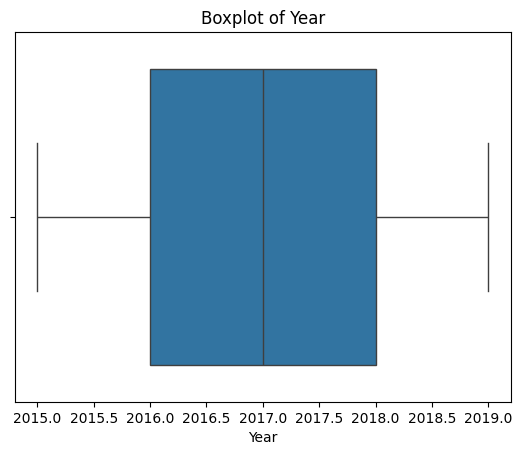

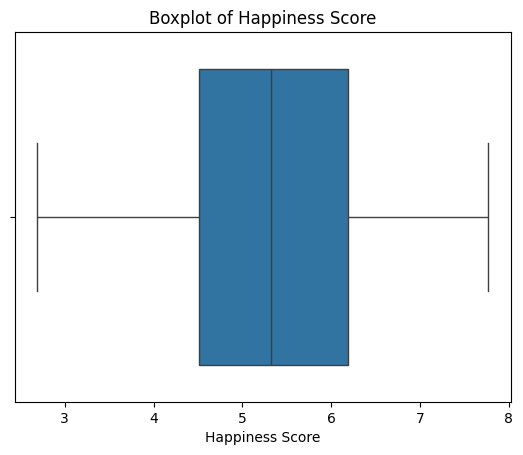

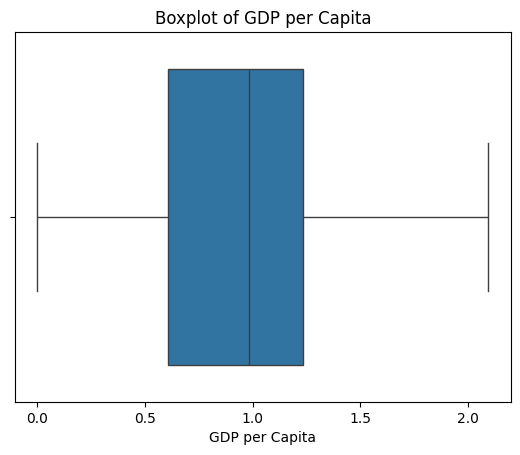

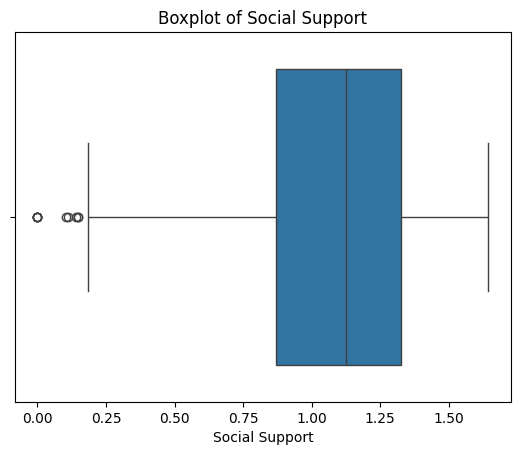

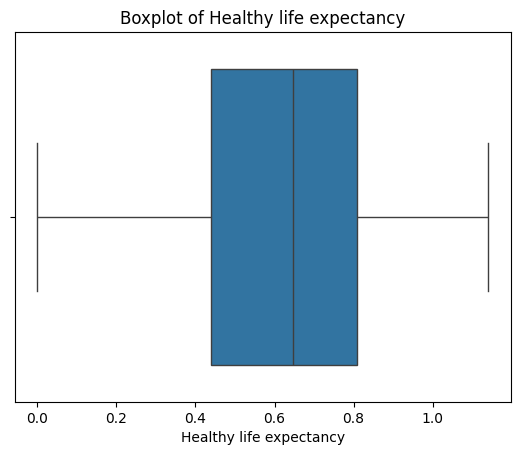

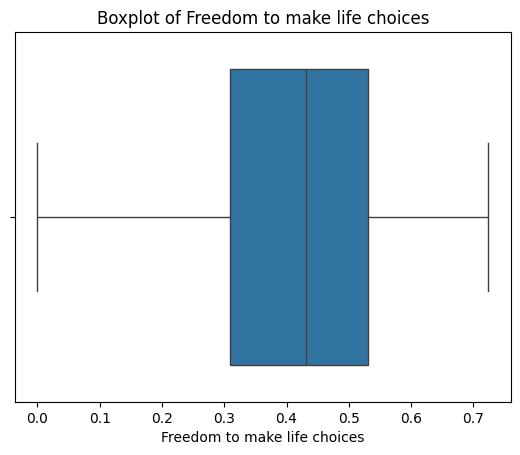

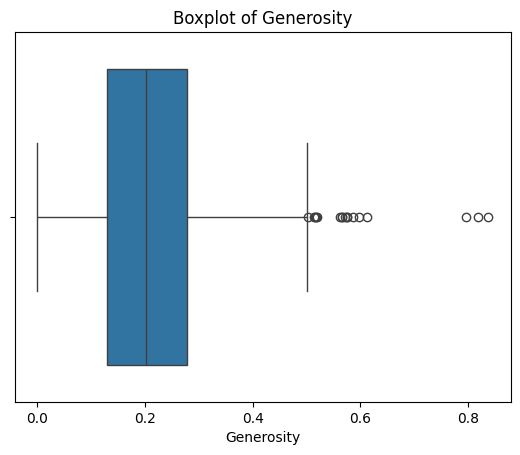

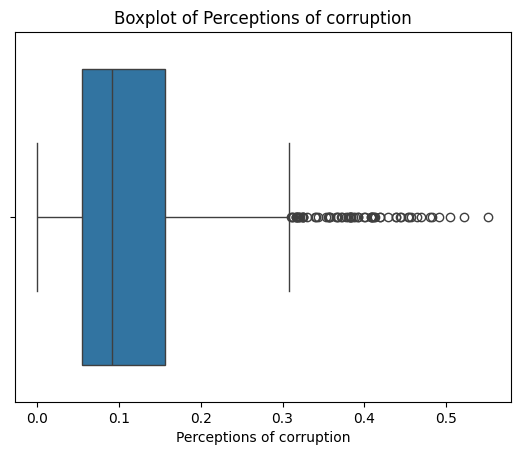

In [5]:
# Plot boxplots for numerical columns
for col in combined_data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure()
    sns.boxplot(x=combined_data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

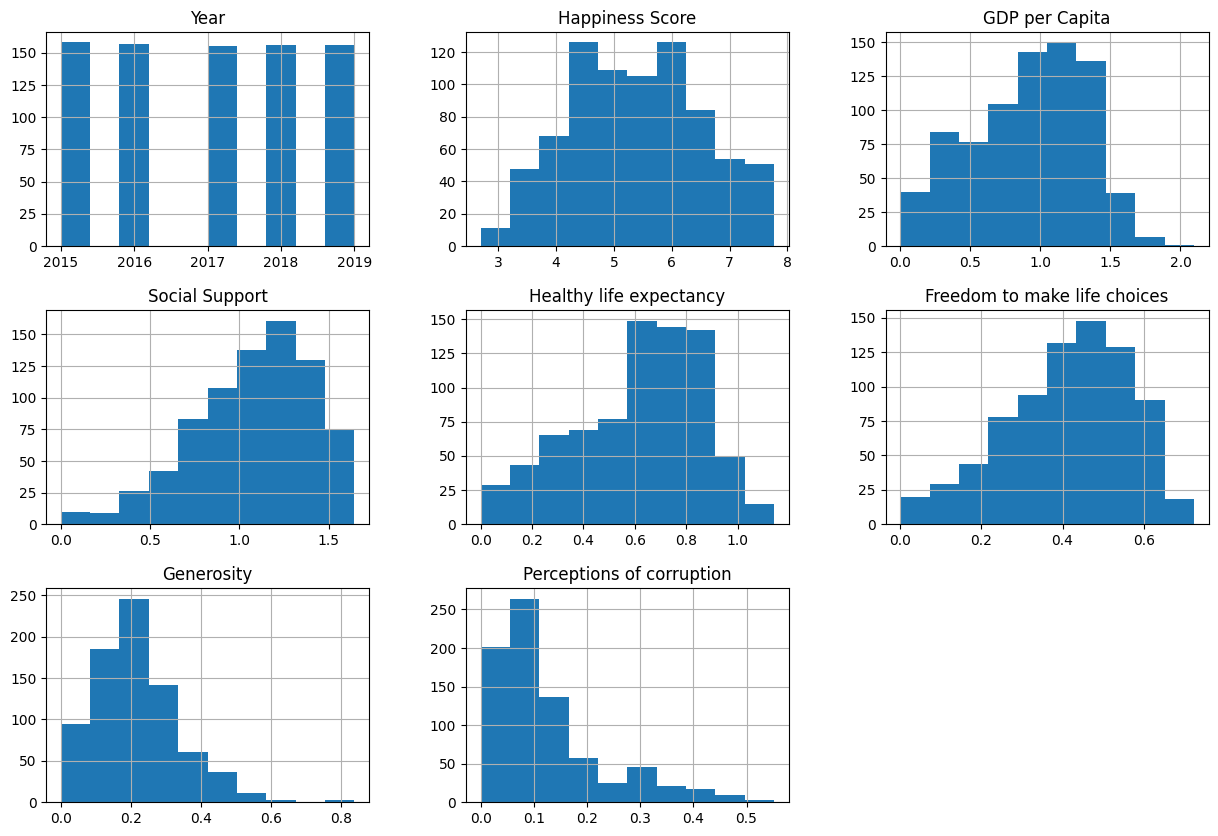

In [6]:
# Plot histograms for numerical columns
combined_data.hist(figsize=(15, 10))
plt.show()

##### Histograms shows that the data is skewed and Boxplot shows that median line is not centred and outliers are present. Hence Median Imputation can be used here to handle the missing values 

In [7]:
# Identify numerical and categorical columns
numerical_cols = combined_data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = combined_data.select_dtypes(include=['object']).columns
#print the columns
print(numerical_cols)
print(categorical_cols)


Index(['Year', 'Happiness Score', 'GDP per Capita', 'Social Support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')
Index(['Country'], dtype='object')


In [8]:
# Impute numerical columns with median
combined_data[numerical_cols] = combined_data[numerical_cols].fillna(combined_data[numerical_cols].median())
combined_data[numerical_cols].isna().sum()

Year                            0
Happiness Score                 0
GDP per Capita                  0
Social Support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

##### Handling Outliers

##### Interquartile Range (IQR) Method: This is suitable for skewed data. It identifies outliers by calculating the IQR

In [9]:
# Check for outliers using IQR method

# Select numeric columns only for IQR calculation
numeric_cols = combined_data.select_dtypes(include=['float64', 'int64']).columns

# Calculate IQR for each numeric feature
Q1 = combined_data[numeric_cols].quantile(0.25)
Q3 = combined_data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((combined_data[numeric_cols] < (Q1 - 1.5 * IQR)) | (combined_data[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Number of outliers in each column
print(combined_data[outliers].count())

Country                         92
Year                            92
Happiness Score                 92
GDP per Capita                  92
Social Support                  92
Healthy life expectancy         92
Freedom to make life choices    92
Generosity                      92
Perceptions of corruption       92
dtype: int64


##### Applying Box-Cox Transformation
Box-Cox Transformation is Used as Data can be positive and you need a more flexible transformation.

In [10]:
# Select numeric columns only
numeric_cols = combined_data.select_dtypes(include=['float64', 'int64']).columns

# Exclude the 'Year' and Happines Score  column from Box-Cox transformation

# numeric_cols_to_transform = [col for col in numeric_cols if col != 'Year']
# #remove the happiness score column from the list along with the year column it should be done in one line
numeric_cols_to_transform = [col for col in numeric_cols if col not in ['Year', 'Happiness Score']]


# Ensure all values are positive by adding a constant (if necessary)
combined_data[numeric_cols_to_transform] = combined_data[numeric_cols_to_transform].apply(lambda x: x + 1 - x.min() if (x <= 0).any() else x)

In [11]:
# Apply Box-Cox transformation to each numeric feature excluding 'Year' and 'Happiness Score'
for col in numeric_cols_to_transform:
    combined_data[col], _ = boxcox(combined_data[col])

# Verify the transformation by checking the first few rows
print(combined_data.head())

       Country  Year  Happiness Score  GDP per Capita  Social Support  \
0  Switzerland  2015            7.587        1.842732        3.034724   
1      Iceland  2015            7.561        1.693694        3.232748   
2      Denmark  2015            7.527        1.730042        3.075748   
3       Norway  2015            7.522        1.943370        2.966604   
4       Canada  2015            7.427        1.731317        2.936263   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                 1.577943                      1.185221    0.195649   
1                 1.593366                      1.088171    0.245754   
2                 1.421219                      1.142005    0.213552   
3                 1.445540                      1.196458    0.215663   
4                 1.493037                      1.099035    0.252198   

   Perceptions of corruption  
0                   0.133544  
1                   0.087264  
2                   0.137052  
3   

Box-Cox Transformation is Used as Data can be positive and we need a more flexible transformation.

# Data Visualization

In [12]:
# Select only numeric columns
numeric_cols = combined_data.select_dtypes(include=[np.number]).columns

# Group by 'Year' and calculate the mean for each year
yearly_data = combined_data.groupby('Year')[numeric_cols].mean()


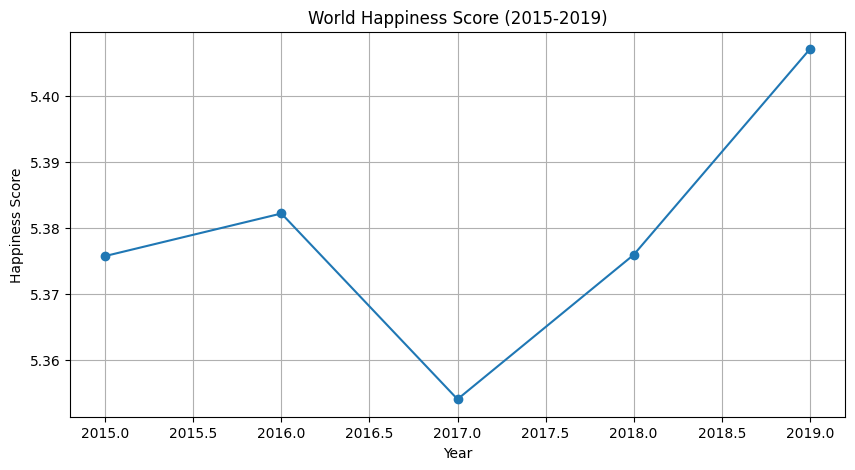

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(yearly_data['Year'], yearly_data['Happiness Score'], marker='o')
plt.title('World Happiness Score (2015-2019)')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.grid(True)
plt.show()

# Feature Engineering

 Interaction features are used to capture the combined effect of two or more features on the target variable that may not be captured by the individual features alone. By including interaction features, you allow the model to learn relationships between features that are not purely additive. This can improve the model’s ability to explain variance in the target variable

In the dataset, the interaction features are:

-GDP_Social_Support: Created by multiplying GDP per Capita and Social Support.

-Health_Freedom: Created by multiplying Healthy life expectancy and Freedom to make life choices.

These interaction features can be useful in the following ways:

-GDP_Social_Support: This feature could capture the combined impact of economic strength and social support on happiness. For example, a country with both high GDP and strong social support systems might have a different impact on happiness than what we would predict by looking at GDP and social support individually.

-Health_Freedom: This feature could capture the combined effect of health and personal freedom on happiness. People in countries with higher life expectancy and greater freedom to make life choices might experience different levels of happiness than what we would predict by looking at these factors separately.

In [14]:
# Create interaction features
combined_data['GDP_Social_Support'] = combined_data['GDP per Capita'] * combined_data['Social Support']
combined_data['Health_Freedom'] = combined_data['Healthy life expectancy'] * combined_data['Freedom to make life choices']

# Apply log transformation to features with wide range of values
combined_data['Log_GDP_per_Capita'] = np.log(combined_data['GDP per Capita'] + 1)
combined_data['Log_Healthy_life_expectancy'] = np.log(combined_data['Healthy life expectancy'] + 1)

# Encode the 'Country' column
label_encoder = LabelEncoder()
combined_data['country_encoded'] = label_encoder.fit_transform(combined_data['Country'])
#i want to reuse the label encoder so i will save it as a pickle file
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)


# Ensure the data is sorted by year
combined_data = combined_data.sort_values(by='Year')

# Save the processed data for modeling
processed_data = combined_data.copy()

# Train Test Split

Using time series cross-validation to ensure each fold uses past data for training and future data for testing. This method is particularly useful when the dataset is small.

The number of splits in TimeSeriesSplit is a parameter that can be adjusted based on the size of your dataset and the balance we want to achieve between the training and testing sets. There is no one-size-fits-all rule for the number of splits.


•	With only 5 years of data, too many splits will lead to very small training and testing sets, which might not be representative.


•	Too few splits might not provide a robust evaluation of the model’s performance.

In [15]:
# Check stationarity of the target variable (Happiness Score)
def check_stationarity(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    for key, value in result[4].items():
        print('Critical Values:')
        print(f'   {key}, {value}')
    return result[1] <= 0.05  # True if p-value is less than 0.05

stationary = check_stationarity(yearly_data['Happiness Score'])

ADF Statistic: -0.937653
p-value: 0.775320
Critical Values:
   1%, -7.355440625
Critical Values:
   5%, -4.474365000000001
Critical Values:
   10%, -3.1269325


The results of the Augmented Dickey-Fuller (ADF) test indicate that the time series is not stationary.

In [16]:
# Apply first-order differencing
if not stationary:
    yearly_data['Happiness Score Diff'] = yearly_data['Happiness Score'].diff().dropna()
    stationary = check_stationarity(yearly_data['Happiness Score Diff'].dropna())

ADF Statistic: -0.876918
p-value: 0.795478
Critical Values:
   1%, -10.41719074074074
Critical Values:
   5%, -5.77838074074074
Critical Values:
   10%, -3.391681111111111


The results of the Augmented Dickey-Fuller (ADF) test indicate that the time series is not stationary. 

In [17]:
# Apply second-order differencing if first-order differencing is not sufficient
try:
    yearly_data['Happiness Score Diff2'] = yearly_data['Happiness Score Diff'].diff().dropna()
    stationary = check_stationarity(yearly_data['Happiness Score Diff2'].dropna())
except Exception as e:
    print(e)

sample size is too short to use selected regression component


In [18]:
# Apply log transformation and check stationarity
yearly_data['Log_Happiness Score'] = np.log(yearly_data['Happiness Score'] + 1)
stationary = check_stationarity(yearly_data['Log_Happiness Score'])

ADF Statistic: -0.940201
p-value: 0.774446
Critical Values:
   1%, -7.355440625
Critical Values:
   5%, -4.474365000000001
Critical Values:
   10%, -3.1269325


The results of the Augmented Dickey-Fuller (ADF) test indicate that the time series is not stationary. 

In [19]:
# since not stationary, apply first-order differencing to the log-transformed data
if not stationary:
    yearly_data['Log_Happiness Score Diff'] = yearly_data['Log_Happiness Score'].diff().dropna()
    stationary = check_stationarity(yearly_data['Log_Happiness Score Diff'].dropna())


ADF Statistic: -0.879479
p-value: 0.794655
Critical Values:
   1%, -10.41719074074074
Critical Values:
   5%, -5.77838074074074
Critical Values:
   10%, -3.391681111111111


The results of the Augmented Dickey-Fuller (ADF) test indicate that the time series is not stationary. 

In [20]:
# Add the differenced series back to the combined data
combined_data['Log_Happiness_Score'] = np.log(combined_data['Happiness Score'] + 1)
combined_data['Happiness_Score_Diff'] = combined_data['Log_Happiness_Score'].diff()

# Use differenced data for ARIMA if necessary
target_variable = 'Happiness Score'

# Handle NaNs in the target variable
combined_data[target_variable].fillna(method='ffill', inplace=True)
combined_data[target_variable].fillna(method='bfill', inplace=True)

/var/folders/tv/3gmlh89s67sdzdp_0t5_5zlm0000gn/T/ipykernel_65044/2868570136.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data[target_variable].fillna(method='ffill', inplace=True)
/var/folders/tv/3gmlh89s67sdzdp_0t5_5zlm0000gn/T/ipykernel_65044/2868570136.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_data[target_variable].fillna(method='ffill', inplace=True)
/var/folders/tv/3gmlh89s67sdzdp_0t5_5zlm0000gn/T/ip

In [21]:
# Function to evaluate a model
def evaluate_model(model_name,model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    #save the model to disk
    filename = model_name + '.pkl'
    pickle.dump(model, open(filename, 'wb'))
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    return train_mse, test_mse, train_mae, test_mae, train_r2, test_r2

# Function to evaluate ARIMA model
def evaluate_arima(train, test):
    history = list(train)
    predictions = []
    for t in range(len(test)):
        model = ARIMA(history, order=(1,1,1))
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    train_mse = mean_squared_error(train, history[:-len(test)])
    test_mse = mean_squared_error(test, predictions)
    train_mae = mean_absolute_error(train, history[:-len(test)])
    test_mae = mean_absolute_error(test, predictions)
    train_r2 = r2_score(train, history[:-len(test)])
    test_r2 = r2_score(test, predictions)
    return train_mse, test_mse, train_mae, test_mae, train_r2, test_r2

# Create a TimeSeriesSplit object with 3 splits
tscv = TimeSeriesSplit(n_splits=3)

# Initialize lists to store results
results = {
    'Model': [],
    'Split': [],
    'Train MSE': [],
    'Test MSE': [],
    'Train MAE': [],
    'Test MAE': [],
    'Train R2': [],
    'Test R2': []
}

# Iterate through splits and evaluate models
split_num = 1
for train_index, test_index in tscv.split(combined_data):
    train_data, test_data = combined_data.iloc[train_index], combined_data.iloc[test_index]
    
    # Select features, excluding the original values and only using log-transformed and interaction features
    feature_cols = [
        'GDP_Social_Support', 'Health_Freedom',
        'Log_GDP_per_Capita', 'Log_Healthy_life_expectancy',
        'country_encoded'
    ]
    X_train = train_data[feature_cols]
    y_train = train_data[target_variable]
    X_test = test_data[feature_cols]
    y_test = test_data[target_variable]
    
    # Feature scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Ensure consistency between X_train and y_train by dropping corresponding NaNs
    X_train = X_train[~np.isnan(y_train)]
    y_train = y_train[~np.isnan(y_train)]
    X_test = X_test[~np.isnan(y_test)]
    y_test = y_test[~np.isnan(y_test)]
    
    # Evaluate Linear Regression
    model_lr = LinearRegression()
    model_name = 'Linear_Regression'
    train_mse_lr, test_mse_lr, train_mae_lr, test_mae_lr, train_r2_lr, test_r2_lr = evaluate_model(model_name,model_lr, X_train, y_train, X_test, y_test)
    results['Model'].append('Linear Regression')
    results['Split'].append(split_num)
    results['Train MSE'].append(train_mse_lr)
    results['Test MSE'].append(test_mse_lr)
    results['Train MAE'].append(train_mae_lr)
    results['Test MAE'].append(test_mae_lr)
    results['Train R2'].append(train_r2_lr)
    results['Test R2'].append(test_r2_lr)
    
    # Evaluate SVM
    model_svm = SVR()
    model_name = 'SVM'
    train_mse_svm, test_mse_svm, train_mae_svm, test_mae_svm, train_r2_svm, test_r2_svm = evaluate_model(model_name,model_svm, X_train, y_train, X_test, y_test)
    results['Model'].append('SVM')
    results['Split'].append(split_num)
    results['Train MSE'].append(train_mse_svm)
    results['Test MSE'].append(test_mse_svm)
    results['Train MAE'].append(train_mae_svm)
    results['Test MAE'].append(test_mae_svm)
    results['Train R2'].append(train_r2_svm)
    results['Test R2'].append(test_r2_svm)
    
    # Evaluate Random Forest
    model_rf = RandomForestRegressor(random_state=42)
    model_name = 'Random_Forest'
    train_mse_rf, test_mse_rf, train_mae_rf, test_mae_rf, train_r2_rf, test_r2_rf = evaluate_model(model_name,model_rf, X_train, y_train, X_test, y_test)
    results['Model'].append('Random Forest')
    results['Split'].append(split_num)
    results['Train MSE'].append(train_mse_rf)
    results['Test MSE'].append(test_mse_rf)
    results['Train MAE'].append(train_mae_rf)
    results['Test MAE'].append(test_mae_rf)
    results['Train R2'].append(train_r2_rf)
    results['Test R2'].append(test_r2_rf)

    # Evaluate ARIMA
    train_y = train_data[target_variable]
    test_y = test_data[target_variable]
    train_y.fillna(method='ffill', inplace=True)
    train_y.fillna(method='bfill', inplace=True)
    test_y.fillna(method='ffill', inplace=True)
    test_y.fillna(method='bfill', inplace=True)
    train_mse_arima, test_mse_arima, train_mae_arima, test_mae_arima, train_r2_arima, test_r2_arima = evaluate_arima(train_y.values, test_y.values)
    results['Model'].append('ARIMA')
    results['Split'].append(split_num)
    results['Train MSE'].append(train_mse_arima)
    results['Test MSE'].append(test_mse_arima)
    results['Train MAE'].append(train_mae_arima)
    results['Test MAE'].append(test_mae_arima)
    results['Train R2'].append(train_r2_arima)
    results['Test R2'].append(test_r2_arima)
    
    split_num += 1



/var/folders/tv/3gmlh89s67sdzdp_0t5_5zlm0000gn/T/ipykernel_65044/290990043.py:119: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_y.fillna(method='ffill', inplace=True)
/var/folders/tv/3gmlh89s67sdzdp_0t5_5zlm0000gn/T/ipykernel_65044/290990043.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_y.fillna(method='ffill', inplace=True)
/var/folders/tv/3gmlh89s67sdzdp_0t5_5zlm0000gn/T/ipykernel_65044/290990043.py:120: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_y.fillna(method='bfill', inplace=True)
/var/folders/tv/3gmlh89s67sdzdp_0t5_5zlm0000gn/T/ipykernel_65044/290990043.py:120: SettingWithCopyWarning: 
A val

In [22]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df

,Model,Split,Train MSE,Test MSE,Train MAE,Test MAE,Train R2,Test R2
0,Linear Regression,1,0.271253,0.463443,0.402316,0.568714,0.754306,0.673105
1,SVM,1,0.223772,0.461507,0.342946,0.560601,0.797313,0.674471
2,Random Forest,1,0.044179,0.502331,0.157992,0.572276,0.959984,0.645675
3,ARIMA,1,0.000000,0.164917,0.000000,0.215575,1.000000,0.883674
4,Linear Regression,2,0.336928,0.302084,0.452938,0.418238,0.734181,0.777611
5,SVM,2,0.245295,0.396280,0.366073,0.518282,0.806475,0.708265
6,Random Forest,2,0.039837,0.216191,0.151293,0.358673,0.968571,0.840844
7,ARIMA,2,0.000000,0.180421,0.000000,0.234825,1.000000,0.867177
8,Linear Regression,3,0.317992,0.309989,0.439343,0.418500,0.763253,0.698998
9,SVM,3,0.237960,0.283506,0.365823,0.427007,0.822838,0.724712


In [23]:
# Determine the best model based on test metrics
best_model = results_df.loc[results_df.groupby('Model')['Test MSE'].idxmin()]
print("Best model based on Test MSE:\n")
best_model

Best model based on Test MSE:



,Model,Split,Train MSE,Test MSE,Train MAE,Test MAE,Train R2,Test R2
3,ARIMA,1,0.000000,0.164917,0.000000,0.215575,1.000000,0.883674
4,Linear Regression,2,0.336928,0.302084,0.452938,0.418238,0.734181,0.777611
6,Random Forest,2,0.039837,0.216191,0.151293,0.358673,0.968571,0.840844
9,SVM,3,0.237960,0.283506,0.365823,0.427007,0.822838,0.724712


	1.	ARIMA:
	•	Training Performance: Excellent (Train MSE = 0, Train R² = 1).
	•	Test Performance: Very good (Test MSE = 0.164917, Test R² = 0.883674).
	•	Analysis: This model shows perfect training performance and very strong test performance, indicating a well-fitted model that generalizes well.
	2.	Linear Regression:
	•	Training and Test Performance: Consistent but relatively poorer compared to other models (Train R² = 0.734181, Test R² = 0.777611).
	•	Analysis: This model has a lower fit and predictive power, making it less suitable for accurate predictions in this context.
	3.	Random Forest:
	•	Training Performance: Very good (Train MSE = 0.039837, Train R² = 0.968571).
	•	Test Performance: Good (Test MSE = 0.216191, Test R² = 0.840844).
	•	Analysis: This model shows strong training performance and good test performance, indicating a reliable fit with minimal overfitting.
	4.	SVM:
	•	Training and Test Performance: Moderate (Train R² = 0.822838, Test R² = 0.724712).
	•	Analysis: This model performs moderately well but is outperformed by ARIMA and Random Forest.


# Interpretations

-ARIMA shows the best training performance (Train MSE, Train MAE, and Train R²) but has only modest performance on the test data (Test MSE, Test MAE, and Test R²)

-Linear Regression has consistent performance between training and test sets, but both are poor, indicating a low fit and predictive power.
	
-Random Forest has a good fit on the training data (high Train R²) but has (negative Test R²), indicating overfitting but better than other models.
	
-SVM has poor performance on both training and test data, with the worst performance on the test data (negative Test R²).

Random Forest is recommended as the machine learning model for prediction, with the condition that steps are taken to mitigate overfitting. This model has shown the potential for capturing complex patterns in the data, and with proper tuning and validation, its performance on the test data can be improved.

# Model Implementaton

In [24]:
#load the model Random_Forest.pkl
loaded_model = pickle.load(open('Random_Forest.pkl', 'rb'))



In [ ]:
#get two inputs one to select the year and the other to select the country 
year = int(input("Enter the year: "))
country = str(input("Enter the country: "))


#input these values 'Country', 'Year', 'Happiness Score', 'GDP per Capita', 'Social Support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'

GDP_per_Capita = float(input("Enter the GDP per Capita: "))
Social_Support = float(input("Enter the Social Support: "))
Healthy_life_expectancy = float(input("Enter the Healthy life expectancy: "))
Freedom_to_make_life_choices = float(input("Enter the Freedom to make life choices: "))
Generosity = float(input("Enter the Generosity: "))
Perceptions_of_corruption = float(input("Enter the Perceptions of corruption: "))
country_encoded = label_encoder.transform([country])[0]
GDP_Social_Support = GDP_per_Capita * Social_Support
Health_Freedom = Healthy_life_expectancy * Freedom_to_make_life_choices
Log_GDP_per_Capita = np.log(GDP_per_Capita + 1)
Log_Healthy_life_expectancy = np.log(Healthy_life_expectancy + 1)

# Create a DataFrame with the input values (all features)
input_data = pd.DataFrame({
    "Country": [country],
    "Year": [year],
    "GDP per Capita": [GDP_per_Capita],
    "Social Support": [Social_Support],
    "Healthy life expectancy": [Healthy_life_expectancy],
    "Freedom to make life choices": [Freedom_to_make_life_choices],
    "Generosity": [Generosity],
    "Perceptions of corruption": [Perceptions_of_corruption],
    'GDP_Social_Support': [GDP_Social_Support],
    'Health_Freedom': [Health_Freedom],
    'Log_GDP_per_Capita': [Log_GDP_per_Capita],
    'Log_Healthy_life_expectancy': [Log_Healthy_life_expectancy],
    'country_encoded': [country_encoded]
})


In [27]:
#load the input data
input_data = pd.read_csv('input_data.csv')

In [28]:
#use  'GDP_Social_Support', 'Health_Freedom','Log_GDP_per_Capita', 'Log_Healthy_life_expectancy', 'country_encoded' as features
features = [
    'GDP_Social_Support', 'Health_Freedom',
    'Log_GDP_per_Capita', 'Log_Healthy_life_expectancy',
    'country_encoded'
]

#use the features to predict the happiness score
prediction = loaded_model.predict(input_data[features])

/Users/jebin/Downloads/HappinesIndex/.venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [29]:
print(prediction[0])

6.548640007324219
